In [10]:
"""
Code to compute PSNR and MSE b/w ground truth image and denoised image

"""

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

def mse(ground_truth, denoised_result):
    # Ensure the images have the same dimensions
    if ground_truth.size != denoised_result.size:
        raise ValueError("Images must have the same dimensions")

    # Convert images to numpy arrays
    arrA = np.array(ground_truth, dtype=np.float64)
    arrB = np.array(denoised_result, dtype=np.float64)

    # Compute the mean squared error
    err = np.mean((arrA - arrB) ** 2)
    return err

def psnr(ground_truth, denoised_result):
    mse_value = mse(ground_truth, denoised_result)
    if mse_value == 0:
        return float('inf')  # PSNR is infinite if there's no error

    # Assume the image pixel values range from 0 to 255
    PIXEL_MAX = 255.0
    psnr_value = 20 * np.log10(PIXEL_MAX / np.sqrt(mse_value))
    return psnr_value

# # Load the images
# ground_truth = Image.open('path_to_ground_truth.png').convert('L')  # Convert to grayscale
# denoised_result = Image.open('path_to_denoised_result.png').convert('L')  # Convert to grayscale

# # Calculate MSE and PSNR
# mse_value = mse(ground_truth, denoised_result)
# psnr_value = psnr(ground_truth, denoised_result)

# print(f"MSE: {mse_value}")
# print(f"PSNR: {psnr_value} dB")

In [35]:
pic_names = ['A56B9015_original.png', 'A56B9022_original.png', 'A56B9023_original.png', 'A56B9042_original.png', 'A56B9043_original.png']
source_path = 'data/noisy_ims/original_pics/'
noisy_path = 'results/noisy_ims/'

original = []
denoised = []


for image in pic_names:
    im = Image.open(os.path.join(source_path, image)).convert('L')
    original.append(im)

In [36]:
A56B9042 = []
A56B9042_name = []
A56B9043 = []
A56B9043_name = []
A56B9022 = []
A56B9022_name = []
A56B9015 = []
A56B9015_name = []
A56B9023 = []
A56B9023_name = []

for image in os.listdir(noisy_path):
    if (image[0] != '.'):
        im = Image.open(os.path.join(noisy_path, image)).convert('L')
        if (image[:8] == 'A56B9042' ):
            A56B9042.append(im)
            A56B9042_name.append(image)
        elif (image[:8] == 'A56B9043' ):
            A56B9043.append(im)
            A56B9043_name.append(image)
        elif (image[:8] == 'A56B9022' ):
            A56B9022.append(im)
            A56B9022_name.append(image)
        elif (image[:8] == 'A56B9015' ):
            A56B9015.append(im)
            A56B9015_name.append(image)
        elif (image[:8] == 'A56B9023' ):
            A56B9023.append(im)
            A56B9023_name.append(image)


In [58]:
#order = gauss, periodic, poisson, quant
total_psnr = np.zeros((5,4))
total_mse = np.zeros((5,4))
total_noisy = [A56B9015, A56B9022, A56B9023, A56B9042, A56B9043]
total_name = [A56B9015_name, A56B9022_name, A56B9023_name, A56B9042_name, A56B9043_name]


for i in range(5):
    for j in range(4):
        MSE = mse(original[i], total_noisy[i][j])
        PSNR = psnr(original[i], total_noisy[i][j])
        
        if (total_name[i][j].find('gauss') != -1):
            total_psnr[i][0] = PSNR
            total_mse[i][0]=MSE
        elif (total_name[i][j].find('periodic') != -1):
            total_psnr[i][1]=PSNR
            total_mse[i][1]=MSE
        elif (total_name[i][j].find('poisson') != -1):
            total_psnr[i][2]=PSNR
            total_mse[i][2]=MSE
        elif (total_name[i][j].find('quant') != -1):
            total_psnr[i][3]=PSNR
            total_mse[i][3]=MSE

In [59]:
print(total_psnr)

[[33.99120435 32.1588405  40.25595386 32.05948453]
 [33.49459326 31.66510293 35.29431402 29.48946163]
 [37.09727412 32.89824269 47.63415026 36.16826893]
 [28.36664922 29.89920854 29.49484814 26.27416335]
 [22.63642919 22.65105696 20.77762959 20.43776753]]


In [60]:
print(total_mse)

[[ 25.9394      39.5545375    6.13034583  40.46987917]
 [ 29.08178333  44.31697083  19.21537917  73.13650417]
 [ 12.686825    33.36230833   1.12115417  15.71279583]
 [ 94.714275    66.55175417  73.04585    153.343025  ]
 [354.35408333 353.16256667 543.64750833 587.9002    ]]


## Plotting

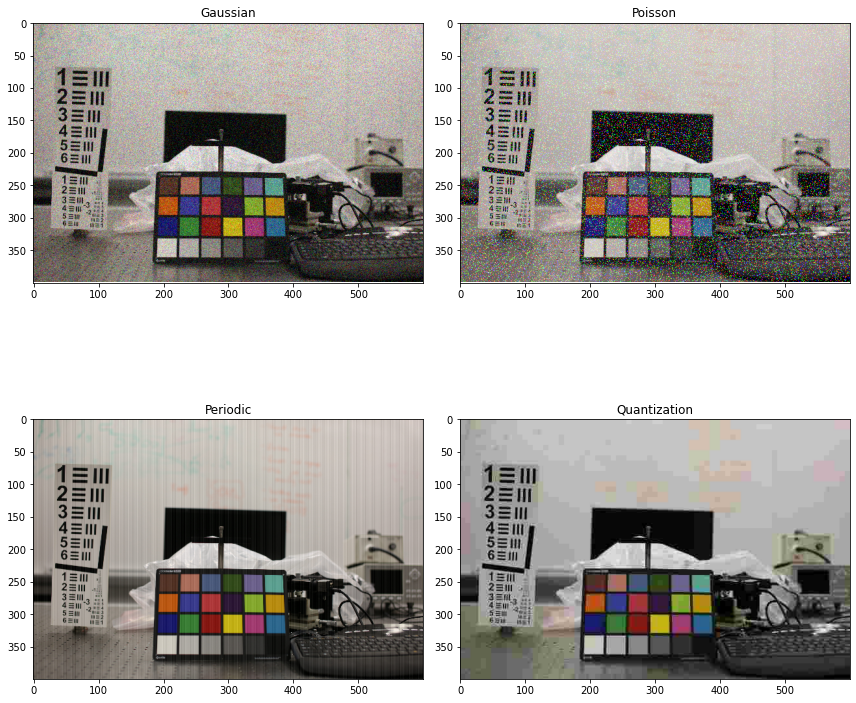

In [77]:
import cv2
gauss = cv2.cvtColor(cv2.imread('data/noisy_ims/A56B9022_gauss.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('data/noisy_ims/A56B9022_poisson.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('data/noisy_ims/A56B9022_periodic.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('data/noisy_ims/A56B9022_quant.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(2,2, figsize=(12,12))
ax[0][0].imshow(gauss)
ax[0][0].set_title('Gaussian')
ax[0][1].imshow(poiss)
ax[0][1].set_title('Poisson')
ax[1][0].imshow(per)
ax[1][0].set_title('Periodic')
ax[1][1].imshow(quant)
ax[1][1].set_title('Quantization')
plt.tight_layout()

Text(0.5, 1.0, 'Original')

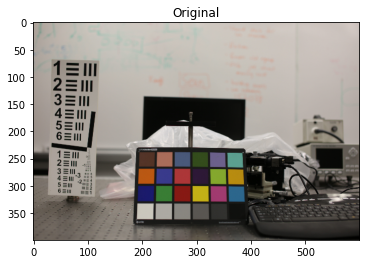

In [76]:
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9022_original.png'), cv2.COLOR_BGR2RGB)
plt.imshow(original)
plt.title('Original')

Text(0.5, 1.0, 'Quantization')

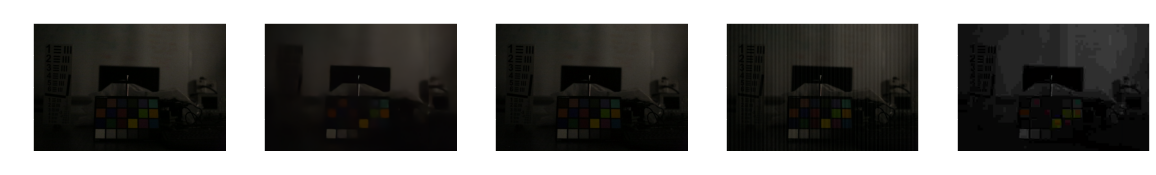

In [89]:
gauss = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9023_gauss_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9023_poisson_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9023_periodic_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9023_quant_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9023_original.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5, figsize=(20,12))
ax[0].imshow(original)
ax[0].set_title('Original', color='w')
ax[1].imshow(gauss)
ax[1].set_title('Gaussian', color='w')
ax[2].imshow(poiss)
ax[2].set_title('Poisson', color='w')
ax[3].imshow(per)
ax[3].set_title('Periodic', color='w')
ax[4].imshow(quant)
ax[4].set_title('Quantization', color='w')

Text(0.5, 1.0, 'Quantization')

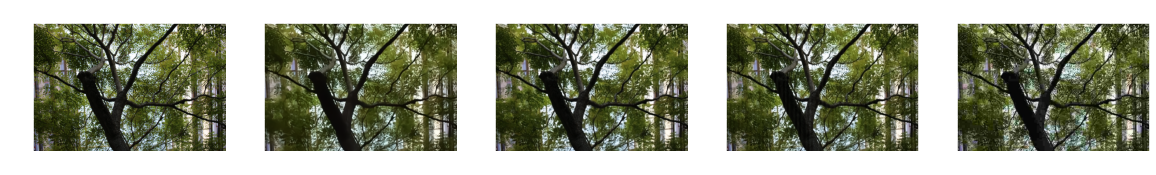

In [90]:
gauss = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9043_gauss_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9043_poisson_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9043_periodic_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9043_quant_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9043_original.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5, figsize=(20,12))
ax[0].imshow(original)
ax[0].set_title('Original', color='w')
ax[1].imshow(gauss)
ax[1].set_title('Gaussian', color='w')
ax[2].imshow(poiss)
ax[2].set_title('Poisson', color='w')
ax[3].imshow(per)
ax[3].set_title('Periodic', color='w')
ax[4].imshow(quant)
ax[4].set_title('Quantization', color='w')

Text(0.5, 1.0, 'Quantization')

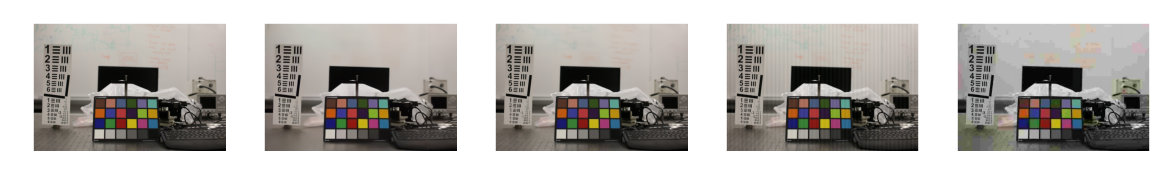

In [91]:
gauss = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9022_gauss_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9022_poisson_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9022_periodic_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('results/noisy_ims/A56B9022_quant_pss2_k0.0.png'), cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9022_original.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5, figsize=(20,12))
ax[0].imshow(original)
ax[0].set_title('Original', color='w')
ax[1].imshow(gauss)
ax[1].set_title('Gaussian', color='w')
ax[2].imshow(poiss)
ax[2].set_title('Poisson', color='w')
ax[3].imshow(per)
ax[3].set_title('Periodic', color='w')
ax[4].imshow(quant)
ax[4].set_title('Quantization', color='w')

## Deep Image Prior

Text(0.5, 1.0, 'Quantization')

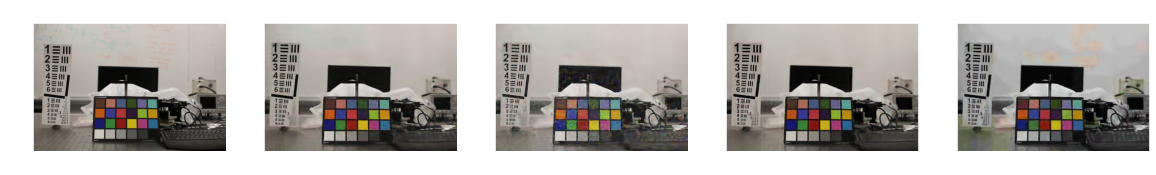

In [23]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
gauss = cv2.cvtColor(cv2.imread('deep_image_prior_result/22gauss.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('deep_image_prior_result/22poisson.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('deep_image_prior_result/22periodic.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('deep_image_prior_result/22quant.png'), cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9022_original.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5, figsize=(20,12))
ax[0].imshow(original)
ax[0].set_title('Original', color='w')
ax[1].imshow(gauss)
ax[1].set_title('Gaussian', color='w')
ax[2].imshow(poiss)
ax[2].set_title('Poisson', color='w')
ax[3].imshow(per)
ax[3].set_title('Periodic', color='w')
ax[4].imshow(quant)
ax[4].set_title('Quantization', color='w')

In [24]:
original = cv2.resize(original, (576,384))
dip_22_psnr = np.zeros(4)
dip_22_mse = np.zeros(4)

dip_22_psnr[0] = psnr(original, gauss)
dip_22_mse[0] = mse(original, gauss)
dip_22_psnr[1] = psnr(original, poiss)
dip_22_mse[1] = mse(original, poiss)
dip_22_psnr[2] = psnr(original, per)
dip_22_mse[2] = mse(original, per)
dip_22_psnr[3] = psnr(original, quant)
dip_22_mse[3] = mse(original, quant)

print(dip_22_psnr)
print(dip_22_mse)

[16.82119197 16.57332706 16.70685841 16.74509777]
[1351.95166016 1431.35597512 1388.01615096 1375.84840224]


Text(0.5, 1.0, 'Quantization')

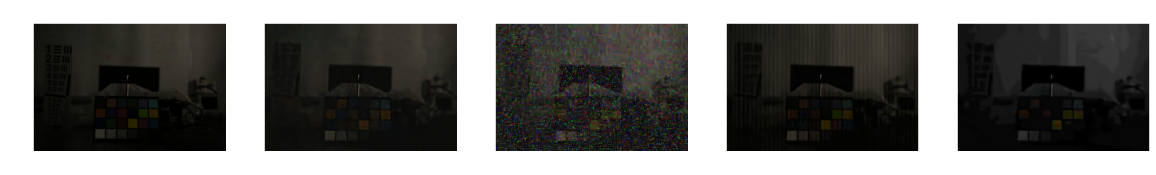

In [25]:
gauss = cv2.cvtColor(cv2.imread('deep_image_prior_result/23gauss.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('deep_image_prior_result/23poisson.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('deep_image_prior_result/23periodic.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('deep_image_prior_result/23quant.png'), cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9023_original.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5, figsize=(20,12))
ax[0].imshow(original)
ax[0].set_title('Original', color='w')
ax[1].imshow(gauss)
ax[1].set_title('Gaussian', color='w')
ax[2].imshow(poiss)
ax[2].set_title('Poisson', color='w')
ax[3].imshow(per)
ax[3].set_title('Periodic', color='w')
ax[4].imshow(quant)
ax[4].set_title('Quantization', color='w')

[30.88330978 18.95396937 32.98401896 32.1939232 ]
[ 53.05781762 827.33885965  32.70984339  39.23629949]


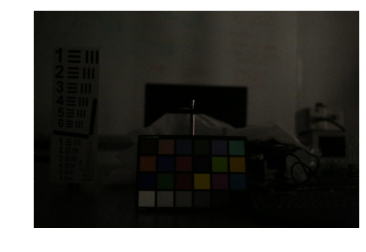

In [26]:
original = cv2.resize(original, (576,384))
dip_22_psnr = np.zeros(4)
dip_22_mse = np.zeros(4)

dip_22_psnr[0] = psnr(original, gauss)
dip_22_mse[0] = mse(original, gauss)
dip_22_psnr[1] = psnr(original, poiss)
dip_22_mse[1] = mse(original, poiss)
dip_22_psnr[2] = psnr(original, per)
dip_22_mse[2] = mse(original, per)
dip_22_psnr[3] = psnr(original, quant)
dip_22_mse[3] = mse(original, quant)

print(dip_22_psnr)
print(dip_22_mse)
plt.imshow(original)

Text(0.5, 1.0, 'Quantization')

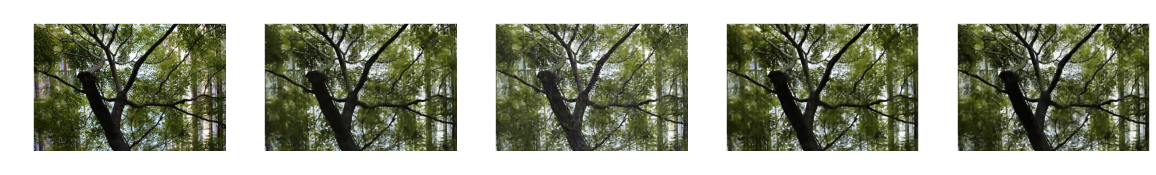

In [27]:
gauss = cv2.cvtColor(cv2.imread('deep_image_prior_result/43gauss.png'), cv2.COLOR_BGR2RGB)
poiss = cv2.cvtColor(cv2.imread('deep_image_prior_result/43poisson.png'), cv2.COLOR_BGR2RGB)
per = cv2.cvtColor(cv2.imread('deep_image_prior_result/43periodic.png'), cv2.COLOR_BGR2RGB)
quant = cv2.cvtColor(cv2.imread('deep_image_prior_result/43quant.png'), cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(cv2.imread('data/noisy_ims/original_pics/A56B9043_original.png'), cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,5, figsize=(20,12))
ax[0].imshow(original)
ax[0].set_title('Original', color='w')
ax[1].imshow(gauss)
ax[1].set_title('Gaussian', color='w')
ax[2].imshow(poiss)
ax[2].set_title('Poisson', color='w')
ax[3].imshow(per)
ax[3].set_title('Periodic', color='w')
ax[4].imshow(quant)
ax[4].set_title('Quantization', color='w')

[12.50488694 12.2732331  12.41683585 12.65865073]
[3652.51212867 3852.62776693 3727.32082942 3525.45591453]


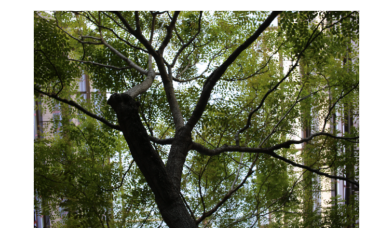

In [28]:
original = cv2.resize(original, (576,384))
dip_22_psnr = np.zeros(4)
dip_22_mse = np.zeros(4)

dip_22_psnr[0] = psnr(original, gauss)
dip_22_mse[0] = mse(original, gauss)
dip_22_psnr[1] = psnr(original, poiss)
dip_22_mse[1] = mse(original, poiss)
dip_22_psnr[2] = psnr(original, per)
dip_22_mse[2] = mse(original, per)
dip_22_psnr[3] = psnr(original, quant)
dip_22_mse[3] = mse(original, quant)

print(dip_22_psnr)
print(dip_22_mse)
plt.imshow(original)